In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## What are the ratios of the reasons of the cancelled flights in year 2003

In [49]:
df = pd.read_csv('dataverse_files/2003.csv',encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6488540 entries, 0 to 6488539
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(12), int64(12), object(5)
memory usage: 1.4+ GB


In [3]:
#we need to drop null values that most probably means that these flight were not cancelled
CancellationCode = df['CancellationCode'].dropna()
cancel_counts = CancellationCode.value_counts()
#Calculate ratio of each reason
sizes = []
for i in cancel_counts:
    sizes.append(i/CancellationCode.count())
sizes

[0.4237955324518778,
 0.3114664557200437,
 0.2612347911251742,
 0.003503220702904283]

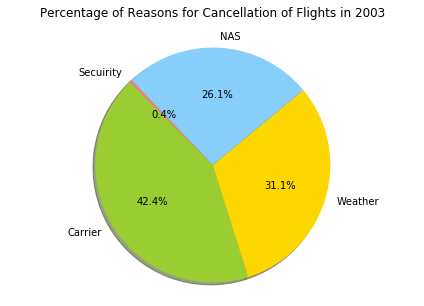

In [4]:
#plot the pie chart
labels = ['Carrier', 'Weather', 'NAS', 'Secuirity']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=135)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of Reasons for Cancellation of Flights in 2003", pad = 20)
plt.show();
del CancellationCode

Carriers are the largest reason for cancellation

## What is the frequency of cancelled and diverted flights in each year from 2000 to 2008

In [5]:
#loading data from each year from 2000 to 2008 and extracting desired info(diverted and cancelled flights count)
cancelled_counts = []
diverted_counts = []
origin_delays={'Year':[],'Origin':[],'DepDelay':[]}
dest_delays={'Year':[],'Dest':[],'ArrDelay':[]}
for year in range(2000, 2009):
    df = pd.read_csv('dataverse_files/{}.csv'.format(year), encoding='latin-1')
    cancelled_counts.append(df.Cancelled.sum())
    diverted_counts.append(df.Diverted.sum())
    df_Origin=df.groupby('Origin')
    df_Dest=df.groupby('Dest')
    top_5_Origin= pd.concat( [ df_Origin.get_group(group) for i,group in enumerate(df_Origin.groups) if i < 5 ] )
    top_5_Dest= pd.concat( [ df_Dest.get_group(group) for i,group in enumerate(df_Dest.groups) if i < 5 ] )
    for x in range(5):##
        origin_delays['Year'].append(year)
        dest_delays['Year'].append(year)
    dummy=top_5_Origin.groupby('Origin')['DepDelay'].mean()
    dummy2=top_5_Dest.groupby('Dest')['ArrDelay'].mean()
    top_5_Origin=top_5_Origin.groupby('Origin')
    top_5_Dest=top_5_Dest.groupby('Dest')
    for x in list(top_5_Origin.groups): 
        origin_delays['Origin'].append(x)
    for x in list(top_5_Dest.groups):    
        dest_delays['Dest'].append(x)
    for x in dummy:    ##
        origin_delays['DepDelay'].append(x)##
    for x in dummy2:    ##
        dest_delays['ArrDelay'].append(x)##
    del df #delete dataframe to free memory
    del dummy
    del dummy2
    del top_5_Origin
    del top_5_Dest

In [6]:
print(cancelled_counts)
print(diverted_counts)

[187490, 231198, 65143, 101469, 127757, 133730, 121934, 160748, 64442]
[14254, 12909, 8356, 11381, 13784, 14028, 16186, 17179, 5654]


In [7]:
#create list of years
years = list(range(2000,2009))
years

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]

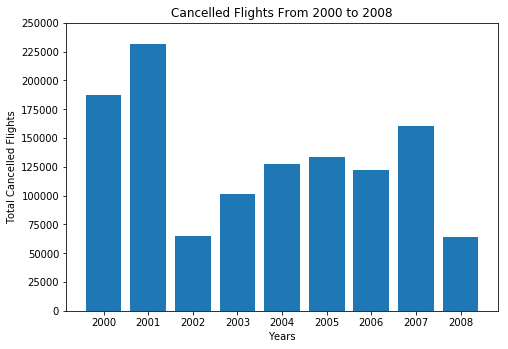

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,cancelled_counts)
ax.set_ylabel('Total Cancelled Flights')
ax.set_xlabel('Years')
ax.set_title('Cancelled Flights From 2000 to 2008')
plt.xticks(years)
plt.yticks(list(range(0,250001,25000)))
plt.show();

From the Bar chart above we see that the year 2001 has the most cancelled flights while the 2002 has the lowest

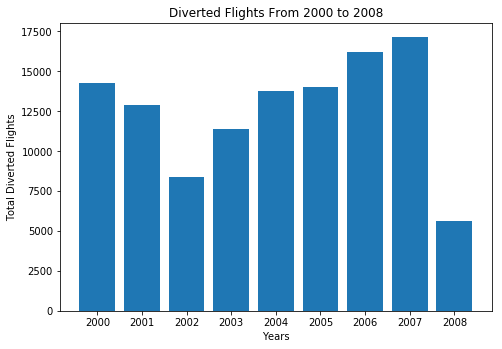

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,diverted_counts)
ax.set_ylabel('Total Diverted Flights')
ax.set_xlabel('Years')
ax.set_title('Diverted Flights From 2000 to 2008')
plt.xticks(years)
plt.show();

From the Bar chart above we see that the year 2007 has the most diverted flights but not with a large margin while the year 2008 has the lowest by a big margin 

## What are the top 20 destination airports that divert flights in year 2003

In [10]:
df = pd.read_csv('dataverse_files/2003.csv',encoding='latin-1')
df_diverted= df[df.Diverted != 0]
df_diverted

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
139,2003,1,7,2,1306.0,1310,NaN,1357,UA,1027,...,0,29,0,NaN,1,NaN,NaN,NaN,NaN,NaN
317,2003,1,1,3,905.0,910,NaN,1026,UA,1037,...,0,17,0,NaN,1,NaN,NaN,NaN,NaN,NaN
2784,2003,1,6,1,1005.0,1005,NaN,1216,UA,1116,...,0,9,0,NaN,1,NaN,NaN,NaN,NaN,NaN
3804,2003,1,30,4,1757.0,1807,NaN,1920,UA,1149,...,0,11,0,NaN,1,NaN,NaN,NaN,NaN,NaN
4410,2003,1,24,5,1129.0,1100,NaN,1614,UA,1166,...,0,19,0,NaN,1,NaN,NaN,NaN,NaN,NaN
5475,2003,1,27,1,1958.0,2000,NaN,2118,UA,1193,...,0,13,0,NaN,1,NaN,NaN,NaN,NaN,NaN
6206,2003,1,8,3,656.0,700,NaN,825,UA,1218,...,0,23,0,NaN,1,NaN,NaN,NaN,NaN,NaN
7820,2003,1,18,6,811.0,815,NaN,952,UA,1263,...,0,13,0,NaN,1,NaN,NaN,NaN,NaN,NaN
11616,2003,1,5,7,926.0,915,NaN,1010,UA,1475,...,0,25,0,NaN,1,NaN,NaN,NaN,NaN,NaN
12371,2003,1,2,4,1410.0,1355,NaN,1955,UA,1498,...,0,55,0,NaN,1,NaN,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [12]:
diverted_flights = df[['Dest','Diverted']]
diverted_flights = diverted_flights[diverted_flights['Diverted']!=0]

In [13]:
diverted_flights.Dest.nunique()

251

In [14]:
dummy1 = diverted_flights['Dest'].value_counts().index
dummy2 = diverted_flights['Dest'].value_counts()
dummy = {'Dest':dummy1,'Count':dummy2}
Dest_Diverted_count = pd.DataFrame(dummy, columns = ['Dest', 'Count']).reset_index(drop=True)
Dest_Diverted_count

,Dest,Count
0,DFW,781
1,IAH,760
2,ORD,666
3,ATL,460
4,EWR,417
5,LGA,360
6,BWI,297
7,LAX,262
8,PHL,250
9,IAD,237


In [15]:
#we are only interested in the top 20 destnations
Dest_Diverted_count = Dest_Diverted_count[0:21]

In [16]:
Dest_Diverted_count

,Dest,Count
0,DFW,781
1,IAH,760
2,ORD,666
3,ATL,460
4,EWR,417
5,LGA,360
6,BWI,297
7,LAX,262
8,PHL,250
9,IAD,237


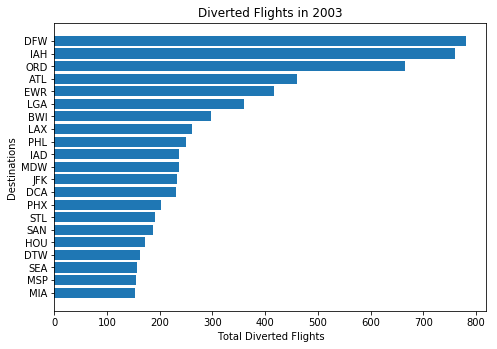

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(Dest_Diverted_count.Dest[::-1], Dest_Diverted_count.Count[::-1])
ax.set_ylabel('Destinations')
ax.set_xlabel('Total Diverted Flights')
ax.set_title('Diverted Flights in 2003')
plt.show();

from the figure we know that DFW, IAH, and ORD has the most diverted flights in year 2003 by a big margin

## What is the relation between month of the year and the weather delay in year 2003

In [18]:
df_month_weather = df[['Month', 'WeatherDelay']]
df_month_weather['WeatherDelay'].fillna(0, inplace=True)

### What is the percentage of the flights that arrived at time in the whole year


In [19]:
df_month_weather[df_month_weather['WeatherDelay'] == 0].count()/df_month_weather.count()

Month           0.993123
WeatherDelay    0.993123
dtype: float64

from the percentage above we will notice that 99.3% of the flight did not have a delay due to weather 

In [20]:
#remove the flights that were not delayed
df_month_weather_new = df_month_weather[df_month_weather['WeatherDelay'] != 0]
df_month_weather_new

,Month,WeatherDelay
2672742,6,26.0
2673895,6,149.0
2673957,6,34.0
2675003,6,41.0
2675013,6,20.0
2675108,6,35.0
2675126,6,17.0
2675127,6,29.0
2675186,6,38.0
2675216,6,24.0


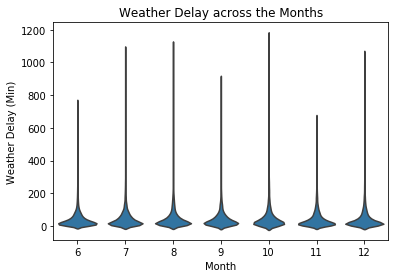

In [21]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_month_weather_new, x = 'Month', y = 'WeatherDelay', color = base_color, inner = None)
ax.set_ylabel('Weather Delay (Min)')
ax.set_xlabel('Month')
ax.set_title('Weather Delay across the Months')
plt.show();

we will notice that the months from 1 to 5 do not exist because i dropped the rows that have zero delays so that means that the first five months of the year did not have any delays because of the weather, also we will notice that the graph is concentrated in the lower section this means that most delays are small

In [22]:
#remove outliers
df_month_weather_clean = df_month_weather_new[(np.abs(stats.zscore(df_month_weather_new)) < 3).all(axis=1)]

In [23]:
df[['Month', 'WeatherDelay']].describe()

,Month,WeatherDelay
count,6.488540e+06,3.815798e+06
mean,6.525727e+00,5.207705e-01
std,3.450800e+00,7.697381e+00
min,1.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00
50%,7.000000e+00,0.000000e+00
75%,1.000000e+01,0.000000e+00
max,1.200000e+01,1.160000e+03


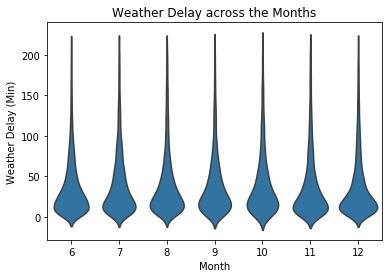

In [24]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_month_weather_clean, x = 'Month', y = 'WeatherDelay', color = base_color, inner = None)
ax.set_ylabel('Weather Delay (Min)')
ax.set_xlabel('Month')
ax.set_title('Weather Delay across the Months')
plt.show();

to further view the delays we removed the outliers and we noticed that most delays are below 50 minutes

In [25]:
df_month_weather_clean.describe()

,Month,WeatherDelay
count,43806.000000,43806.000000
mean,8.752728,39.741268
std,2.112354,39.666474
min,6.000000,1.000000
25%,7.000000,12.000000
50%,8.000000,26.000000
75%,11.000000,53.000000
max,12.000000,211.000000


## What is the relation between distance and the arrival delay in year 2003

In [26]:
df_airtime_arrdelay = df[['ArrDelay','Distance']]
df_airtime_arrdelay.dropna(inplace = True)
df_airtime_arrdelay.describe()

,ArrDelay,Distance
count,6.375689e+06,6.375689e+06
mean,3.596694e+00,7.136012e+02
std,3.031563e+01,5.649878e+02
min,-9.370000e+02,1.200000e+01
25%,-1.000000e+01,3.040000e+02
50%,-3.000000e+00,5.500000e+02
75%,7.000000e+00,9.480000e+02
max,1.612000e+03,4.962000e+03


In [27]:
#we will clean the data. so we will remove the negative delays since we are not interested in those
#also we will remove delays greater than 100 minutes since they are few and will affect the graph when plotting them
df_airtime_arrdelay_clean = df_airtime_arrdelay[df_airtime_arrdelay['ArrDelay']>0]
df_airtime_arrdelay_clean = df_airtime_arrdelay_clean[df_airtime_arrdelay_clean['ArrDelay']<100]

#since there are too many points to plot we will take a sample of only 10000
sample = df_airtime_arrdelay_clean.sample(10000)

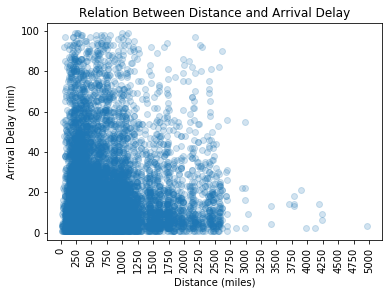

In [28]:
plt.scatter(sample['Distance'], sample['ArrDelay'], alpha=0.2)
plt.xticks(list(range(0,5001,250)), rotation = 90)
ax = plt.gca()
ax.set_ylabel('Arrival Delay (min)')
ax.set_xlabel('Distance (miles)')
ax.set_title('Relation Between Distance and Arrival Delay')
plt.show();

From the scatter plot we will notice that there is an inverse relation between the distance and the Arrival Delay so shorter trips tend to be more delayed than the longer ones 

## What is the relation between departure  delay and origin

### We will only work with the top 5 busiest airports

In [29]:
df_dep_delay_origin = df[['DepDelay','Origin']]
df_dep_delay_origin.dropna(inplace=True)
df_dep_delay_origin.nunique()

DepDelay    1062
Origin       282
dtype: int64

In [30]:
top_5_origins = df_dep_delay_origin.Origin.value_counts().index[:5]
top_5_origins
df_top5_origins = pd.DataFrame()
Origins_values = []
for i in range(0,len(top_5_origins)):
    df_top5_origins = pd.concat([df_top5_origins ,df_dep_delay_origin[df_dep_delay_origin.values == top_5_origins[i]]])
df_top5_origins=df_top5_origins[df_top5_origins['DepDelay']<10]
df_top5_origins=df_top5_origins[df_top5_origins['DepDelay']>-10]
df_top5_origins

,DepDelay,Origin
317,-5.0,ATL
318,5.0,ATL
319,-2.0,ATL
320,-2.0,ATL
321,-3.0,ATL
322,9.0,ATL
2745,-7.0,ATL
2746,-7.0,ATL
2747,-5.0,ATL
2748,-6.0,ATL


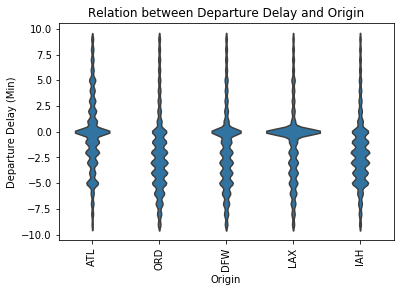

In [31]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_top5_origins, x = 'Origin', y = 'DepDelay', color = base_color, inner = None)
ax.set_ylabel('Departure Delay (Min)')
ax.set_xlabel('Origin')
ax.set_title('Relation between Departure Delay and Origin')
plt.xticks(rotation=90)
plt.show();

We notice that LAX airport is the airport with most departures on time and ORD and IAH are the most airports with early delays

## What is the average departure delay by origin from 2000 to 2008 

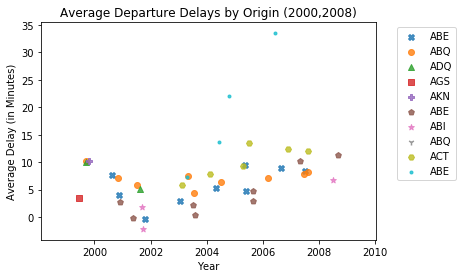

In [46]:
origin_delaysin_delays = pd.DataFrame(data=origin_delays)
origin_delays = origin_delays[origin_delays['DepDelay']<40]
tt_shapes=[['ABE','X'],['ABQ','o'],['ADQ','^'],['AGS','s'],['AKN','P'],['ABI','p'],['ACT','*'],['ACY','1'],['ABY','H'],['ACK','.']]
for c,shape in tt_shapes:
    plt_data=origin_delays.loc[origin_delays['Origin']==c];
    sb.regplot(data=plt_data,x = 'Year', y = 'DepDelay',marker=shape,fit_reg=False,x_jitter=0.7)
plt.ylabel('Average Delay (in Minutes)');
plt.legend(origin_delays.Origin, loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.title('Average Departure Delays by Origin (2000,2008)');

We will notice that most delays are between 0 and 10 minutes and also ABE airport has the largest delays

## What is the average arrival delay by destination from 2000 to 2008 

In [35]:
dest_delays = pd.DataFrame(data=dest_delays)
dest_delays.head()

,Year,Dest,ArrDelay
0,2000,ABE,11.012352
1,2000,ABQ,11.509966
2,2000,ADQ,10.043284
3,2000,AGS,5.140947
4,2000,AKN,13.214533


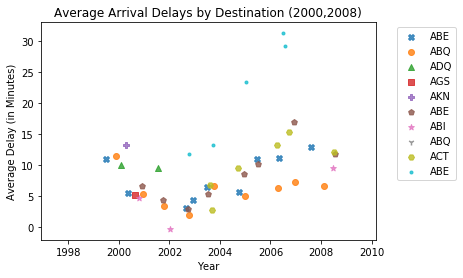

In [45]:
tt_shapes=[['ABE','X'],['ABQ','o'],['ADQ','^'],['AGS','s'],['AKN','P'],['ABI','p'],['ACT','*'],['ACY','1'],['ABY','H'],['ACK','.']]
for c,shape in tt_shapes:
    plt_data=dest_delays.loc[dest_delays['Dest']==c];
    sb.regplot(data=plt_data,x = 'Year', y = 'ArrDelay',marker=shape,fit_reg=False,x_jitter=0.7)
plt.ylabel('Average Delay (in Minutes)');
plt.legend(origin_delays.Origin, loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.title('Average Arrival Delays by Destination (2000,2008)');

We will notice that most delays are between 0 and 15 minutes and also ABE airport has the largest delays

## What is the relation between arrival and departure delays with respect to carriers

In [37]:
outliers = (((df.DepDelay - df.DepDelay.mean()).abs() > df.DepDelay.std()*3) | 
            ((df.ArrDelay - df.ArrDelay.mean()).abs() > df.ArrDelay.std()*3))

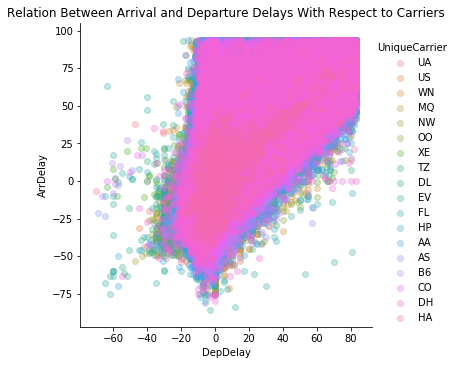

In [48]:
sb.lmplot('DepDelay', 'ArrDelay', data=df[~outliers],
           fit_reg=False, hue='UniqueCarrier', scatter_kws={'alpha':0.3})
plt.title("Relation Between Arrival and Departure Delays With Respect to Carriers")
plt.show();

We can see that most delays are in the first quadrant so most arrival and departure delays tends to be from zero to 100, also there seems to be a large number of flights that depart and arrive early